## Gathering data

In [1]:
#Importing the relevant packages
import pandas as pd
import numpy as np
import tweepy
import requests
import os
import json
import timeit
import re
import datetime

In [2]:
#Reading in the list of twitter ids from the manually downloaded file
df_tweets = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Creating a list from the tweet ids in the csv file used for querying the Twitter API
tweet_id_list = []
for i in df_tweets['tweet_id']:
    tweet_id_list.append(i)

In [4]:
#Downloading the image predictions content and writing it to a file, code is commented out due to path links that will only work on my local machine
#folder_name = '/Users/Joerg/Desktop/repositories/udacity-submitted-projects/project4'
#url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#response = requests.get(url)

#with open(os.path.join(folder_name, 'image-predictions.tsv'), mode='wb') as file:
#    file.write(reponse.content)

In [5]:
#Reading in dataframe of image predictions from the above downloaded tsv file
df_preds = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
#authenticating at the Twitter API, code is commented out, as I had to take out API secrets and code will not work when running the cell
#consumer_key = CONSUMER_KEY
#consumer_secret = CONSUMER_SECRET
#access_token = ACCESS_TOKEN
#access_secret = ACCESS_SECRET

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

source for inspiration for the following code cell: https://stackoverflow.com/questions/17055117/python-json-dump-append-to-txt-with-each-variable-on-new-line

In [7]:
#Getting the tweet's json data for all id's in the list, copied out due to API credentials
#start = timeit.timeit()
#error_ids = []

#with open('tweet_json.txt', 'w') as f:
#    for i in tweet_id_list:
#        try:
#            print(i)
#            tweet = api.get_status(i, tweet_mode='extended')
#        except Exception as e:
#            error_ids.append(i)
#        json.dump(tweet._json, f)
#        f.write('\n')
        
#end = timeit.timeit()
#print(end - start)

In [8]:
#Reading the data from the text-json.txt file into a pd.DataFrame, using the provided .txt file in order not to have any hick-ups along the way
tweets_info = []
with open('tweet-json.txt', encoding='utf-8') as f:
    for line in f:
        tweets_info.append(json.loads(line))
        
df_tweetsinfo = pd.DataFrame(tweets_info)

In [9]:
#Checking the dataframe if operation worked correctly
df_tweetsinfo.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [10]:
#Checking columns names of the dataframe
df_tweetsinfo.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [11]:
#Filtering the df to the selected columns
df_tweetsfiltered = df_tweetsinfo[['id', 'retweet_count', 'favorite_count']]

In [12]:
df_tweetsfiltered.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing data

__For reference, the names of the three dataframes created in the 'gathering data' part:__
- df_tweets: contains the manually downloaded data
- df_preds: contains the data downloaded via request package
- df_tweetsfiltered: contains the data downloaded via the Twitter API using tweepy

__Quality Issues:__

__df_tweets__:
- Retweets & non-dog rating tweets are included in the dataset
- Column 'timestamp' & 'retweeted_status_timestamp' are not in the correct date format
- Column 'source' does not hold any relevant information
- 'expanded_urls' are missing for some tweets, some tweets have duplicate url strings or urls not belonging to twitter
- 'name' column is erroneous: Some namings are incorrect, nonsense namings in name column: e.g. "an", "a", "the", "quite"
- 'None' string values in columns instead of real None values
- Ratings are not all correct > denominator/nominator sometimes differs from the original tweets

__df_preds__:
- p1,p2,p3 have mixed capital sizing within the predicted dog races


__Tidiness Issues:__

__df_tweets__:
- The information contained in 'doggo', 'pupper' etc. could be displayed more tidy in one column, e.g. "dog type"

__df_preds__:
- The table should only contain the dog prediction with the highest confidence and only if we have one true prediction (true=dogs) among all predictions for that row
- All tables should be joined into one master table



## Cleaning data

__Retweets & non-dog rating tweets included__

#### Define: Drop retweets (RT) from df_tweets & check if 'expanded_urls' is empty

#### Code:

In [13]:
#Making copy of the dataframes for cleaning
df_tweets_copy = df_tweets.copy()

In [14]:
#Check if "text" column in df_tweets if string starts with "RT"
RT = df_tweets_copy['text'].apply(lambda x: re.search("^RT.*", x))

In [15]:
#If the regex finds a match, it's a retweet and therefore should be dropped > keep all rows where RT is not null
df_tweets_clean = df_tweets_copy[RT.isnull()]

In [16]:
#Removing all rows where expanded_url is empty as most of them are replies and also we have no link to the picture > only tweets with pictures should be kept
df_tweets_clean = df_tweets_clean[df_tweets_clean['expanded_urls'].notnull()]

In [17]:
#Drop replies from the dataframe as well as we only want original tweets
df_tweets_clean = df_tweets_clean[df_tweets_clean['in_reply_to_status_id'].isnull()]

In [18]:
#Some columns don't contain values anymore, so they can be dropped
df_tweets_clean = df_tweets_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

#### Test:

In [19]:
#Check if columns are gone
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2092 non-null int64
timestamp             2092 non-null object
source                2092 non-null object
text                  2092 non-null object
expanded_urls         2092 non-null object
rating_numerator      2092 non-null int64
rating_denominator    2092 non-null int64
name                  2092 non-null object
doggo                 2092 non-null object
floofer               2092 non-null object
pupper                2092 non-null object
puppo                 2092 non-null object
dtypes: int64(3), object(9)
memory usage: 212.5+ KB


In [20]:
#Check if retweets are gone
RT = df_tweets_clean['text'].apply(lambda x: re.search("^RT.*", x))
RT.sum()

0

__Timestamp & retweeted_status_timestamp are not in correct date format__

#### Define:  transform timestamp to datetime, retweeted_status_timestamp has already been deleted

#### Code:

In [21]:
#Transform column to datetime
df_tweets_clean['timestamp'] = pd.to_datetime(df_tweets_clean['timestamp'])

#### Test:

In [22]:
#Check format
df_tweets_clean['timestamp'].dtype

datetime64[ns, UTC]

__Column "source" does not hold any relevant information__

#### Define: Drop the column from the dataset as it does not carry any relevant information

#### Code:

In [23]:
#Drop source column
df_tweets_clean = df_tweets_clean.drop(columns=['source'])

#### Test:

In [24]:
#Check if column is gone
df_tweets_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

__Urls missing for some tweets, some have duplicate strings of faulty urls not belonging to twitter urls__

#### Define: split the expanded_url column and keep the last value, if there is no twitter url present, drop the rows as they are no original tweets

#### Code:

In [25]:
#Split urls and if multiple ones are present, keep the last one as visual assessment showed that those were twitter urls
df_tweets_clean['expanded_urls'] = df_tweets_clean['expanded_urls'].apply(lambda x: x.split(",")[-1])

In [26]:
#Moreover expanded URL should start with 'https://twitter.com/dog_rates/status/', other urls like vine.co contain videos and not pictures as was required
twitter_urls = df_tweets_clean['expanded_urls'].apply(lambda x: re.search("^https://twitter.com/dog_rates/status/", x))

In [27]:
#Drop the rows where expanded_url does not start with the correct twitter url format
indeces_to_drop = df_tweets_clean[twitter_urls.isnull()].index
df_tweets_clean = df_tweets_clean.drop(indeces_to_drop)

#### Test:

In [28]:
#Check if the non-twitter rows are gone
df_tweets_clean[df_tweets_clean['expanded_urls'].apply(lambda x: re.search("^https://twitter.com/dog_rates/status/", x)).isnull()]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


__"name" column erroneous: names are missing > 'None' & partially incorrect, also nonsense in name column: e.g. "an", "a", "the", "quite"__

#### Define: The correct names could partially be manually extracted, but does not solve the problem of no "None" values as some tweets just lack the names. There the incorrect ones will be set to None and the None values are kept as is.

#### Code:

In [29]:
#As names start with capital letter, let's extract cells with lower capitalized words
regex_name = df_tweets_clean['name'].apply(lambda x: re.search('^[a-z].*', x))
faulty_names = df_tweets_clean[regex_name.notnull()]

In [30]:
faulty_names.index

Int64Index([  22,   56,  169,  193,  369,  542,  649,  801,  819,  852,  924,
             988,  992,  993, 1002, 1004, 1017, 1025, 1031, 1049, 1063, 1071,
            1097, 1120, 1121, 1138, 1193, 1207, 1259, 1340, 1351, 1361, 1362,
            1368, 1382, 1385, 1435, 1457, 1499, 1527, 1603, 1693, 1724, 1737,
            1747, 1785, 1797, 1815, 1853, 1854, 1877, 1878, 1923, 1936, 1941,
            1955, 1994, 2001, 2019, 2030, 2034, 2037, 2066, 2116, 2125, 2128,
            2146, 2153, 2161, 2191, 2198, 2204, 2211, 2218, 2222, 2235, 2249,
            2255, 2264, 2273, 2287, 2304, 2311, 2314, 2326, 2327, 2333, 2334,
            2335, 2345, 2346, 2347, 2348, 2349, 2350, 2352, 2353, 2354],
           dtype='int64')

In [31]:
#Looping through the rows with faulty names and replacing them with np.nan
#https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index
for i in faulty_names.index:
    df_tweets_clean.at[i, 'name'] = np.nan

In [32]:
#Recheck if we now have real null values in name column
df_tweets_clean['name'].isnull().sum()

98

__Replace the 'None' string values with real NaN values for the dog type columns__

#### Define: Replace 'None' strings with np.nan

#### Code:

In [33]:
#Replace all string values in table with np.nan
df_tweets_clean = df_tweets_clean.replace('None', np.nan)

#### Test:

In [34]:
#Check if number of non-null objects has decreased
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              1970 non-null int64
timestamp             1970 non-null datetime64[ns, UTC]
text                  1970 non-null object
expanded_urls         1970 non-null object
rating_numerator      1970 non-null int64
rating_denominator    1970 non-null int64
name                  1349 non-null object
doggo                 73 non-null object
floofer               8 non-null object
pupper                209 non-null object
puppo                 23 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 264.7+ KB


__Ratings are not all correct > denominator/numerator varies from tweets__

#### Define: Extract the values for numerator and denominator from the original tweets and replace the existing columns

#### Code:

In [35]:
#Resetting index of dataframe to make it easier to lookup things
df_tweets_clean.reset_index(inplace=True, drop=True)

In [36]:
#Extract the numerator from the text field and replace the current column
df_tweets_clean['rating_corrected'] = df_tweets_clean['text'].apply(lambda x: re.findall('\d{1,4}\/\d{1,3}', x)).str[-1].astype(str)

In [37]:
df_tweets_clean['rating_numerator'] = df_tweets_clean['rating_corrected'].apply(lambda x: x.split("/")).str[0].astype(int)

In [38]:
df_tweets_clean['rating_denominator'] = df_tweets_clean['rating_corrected'].apply(lambda x: x.split("/")).str[1].astype(int)

In [39]:
#Drop the column that was created to aid in splitting the values
df_tweets_clean = df_tweets_clean.drop('rating_corrected', axis=1)

In [40]:
#Checking the values for denominator
df_tweets_clean['rating_denominator'].value_counts()

10     1958
80        2
50        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
7         1
Name: rating_denominator, dtype: int64

In [41]:
#Taking a closer look if the non 10 denominators are correct
df_tweets_clean.sort_values('rating_denominator')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
382,810984652412424192,2016-12-19 23:06:23+00:00,Meet Sam. She smiles 24/7 &amp; secretly aspir...,https://twitter.com/dog_rates/status/810984652...,24,7,Sam,NaN,NaN,NaN,NaN
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1321,682393905736888321,2015-12-31 02:52:40+00:00,This is Kreg. He's riding an invisible jet ski...,https://twitter.com/dog_rates/status/682393905...,11,10,Kreg,NaN,NaN,NaN,NaN
1320,682406705142087680,2015-12-31 03:43:31+00:00,This is Patrick. He's a bigass pupper. 7/10 ht...,https://twitter.com/dog_rates/status/682406705...,7,10,Patrick,NaN,NaN,pupper,NaN
1319,682429480204398592,2015-12-31 05:14:01+00:00,"I know we joke around on here, but this is get...",https://twitter.com/dog_rates/status/682429480...,8,10,NaN,NaN,NaN,NaN,NaN
1318,682638830361513985,2015-12-31 19:05:54+00:00,I have no words. Just a magnificent pup. 12/10...,https://twitter.com/dog_rates/status/682638830...,12,10,NaN,NaN,NaN,NaN,NaN
1317,682662431982772225,2015-12-31 20:39:41+00:00,Meet Joey and Izzy. Joey only has one ear that...,https://twitter.com/dog_rates/status/682662431...,11,10,Joey,NaN,NaN,NaN,NaN
1316,682697186228989953,2015-12-31 22:57:47+00:00,NAAAAAAA ZAPENYAAAAA MABADI-CHIBAWAAA 12/10 ht...,https://twitter.com/dog_rates/status/682697186...,12,10,NaN,NaN,NaN,NaN,NaN
1315,682750546109968385,2016-01-01 02:29:49+00:00,Meet Taco. He's a speckled Garnier Fructis. Lo...,https://twitter.com/dog_rates/status/682750546...,9,10,Taco,NaN,NaN,NaN,NaN
1314,682788441537560576,2016-01-01 05:00:24+00:00,Happy New Year from your fav holiday squad! 🎉 ...,https://twitter.com/dog_rates/status/682788441...,12,10,NaN,NaN,NaN,pupper,NaN


In [42]:
#Check for the cases where the denominator is not equal to 10
for i in df_tweets_clean[df_tweets_clean['rating_denominator']!=10].index:
    print(i, df_tweets_clean.iloc[i]['text'])

320 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
382 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
658 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
842 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
939 Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
963 Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
981 From left to right:
Cletus, Jerome, Alejandro, Burp, &amp; Titson
None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
1045 Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa
1120 Happy Wednesday here's a bucket of pups. 44/40 would pet all a

In [43]:
#drop index=382 as we have no rating there, but just the saying "24/7"
df_tweets_clean = df_tweets_clean.drop(382)

#### Test:

In [44]:
df_tweets_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


__p1,p2,p3 have mixed capital sizing within the predicted dog races__

#### Define: Adjust all spellings to lower case

#### Code:

In [45]:
#Making a copy of the df_preds dataframe prior to cleaning
df_preds_clean = df_preds.copy()

In [46]:
df_preds_clean['p1'] = df_preds_clean['p1'].apply(lambda x: x.lower())
df_preds_clean['p2'] = df_preds_clean['p2'].apply(lambda x: x.lower())
df_preds_clean['p3'] = df_preds_clean['p3'].apply(lambda x: x.lower())

#### Test:

In [47]:
df_preds_clean['p1'].str.isupper().sum()

0

# Tidiness Issues:

__df_tweets__:
- The information contained in 'doggo', 'pupper' etc. could be displayed more tiday in one column, e.g. "dog type"

__df_preds__:
- The table should only contain the dog prediction with the highest confidence and only if we have one true prediction (true=dogs) among all predictions for that row
- All tables should be joined into one master table



__The information contained in 'doggo', 'pupper' etc. could be displayed more tiday in one column, e.g. "dog type"__

#### Define: Merge the values of the four columns into one

#### Code:

source of inspiration for the following code: https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas

In [48]:
#Join the columns and drop the n/a values
df_tweets_clean['dog_type'] = df_tweets_clean[df_tweets_clean.columns[7:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

In [49]:
df_tweets_clean['dog_type'] = df_tweets_clean['dog_type'].replace('', np.nan)

#### Test:

In [50]:
df_tweets_clean['dog_type'].value_counts()

pupper           201
doggo             63
puppo             22
doggo,pupper       8
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: dog_type, dtype: int64

In [51]:
#Drop the columns that are now irrelevant
df_tweets_clean = df_tweets_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

In [52]:
#Check for one of the cases with double dog assignments
df_tweets_clean[df_tweets_clean['dog_type']=="doggo,floofer"]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
152,854010172552949760,2017-04-17 16:34:26+00:00,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,NaN,"doggo,floofer"


__Table should only contain the prediction with the highest confidence and only if we have one true prediction (true=dogs) among all predictions for that row__

#### Define: Take the value from the column with highest confidence, if it is a predicted dog. If not take the second or third one. Don't take any if no dog has been predicted

source of inspiration for the following code: https://stackoverflow.com/questions/53173081/python-pandas-copy-string-from-one-cell-to-another-based-on-multiple-conditions

#### Code:

In [53]:
#Create masks that can be checked against
mask1 = df_preds_clean['p1_dog'] == True
mask2 = df_preds_clean['p2_dog'] == True
mask3 = df_preds_clean['p3_dog'] == True
mask4 = df_preds_clean['p1_dog'] == False
mask5 = df_preds_clean['p2_dog'] == False

df_preds_clean = df_preds_clean.assign(predicted_breed=df_preds_clean.p1.where(mask1, df_preds_clean['p1_dog']))
df_preds_clean = df_preds_clean.assign(predicted_confidence=df_preds_clean.p1_conf.where(mask1, df_preds_clean['p1_dog']))

In [54]:
#If for a row, p1 was no dog prediction, but p2 contained a dog prediction:
df_preds_clean = df_preds_clean.assign(predicted_breed=df_preds_clean.p2.where(mask4 & mask2, df_preds_clean['predicted_breed']))
df_preds_clean = df_preds_clean.assign(predicted_confidence=df_preds_clean.p2_conf.where(mask4 & mask2, df_preds_clean['predicted_confidence']))

In [55]:
#If p3 was the first to be a true dog prediction:
df_preds_clean = df_preds_clean.assign(predicted_breed=df_preds_clean.p3.where(mask5 & mask3, df_preds_clean['predicted_breed']))
df_preds_clean = df_preds_clean.assign(predicted_confidence=df_preds_clean.p3_conf.where(mask5 & mask3, df_preds_clean['predicted_confidence']))

In [56]:
#Drop the columns
df_preds_clean = df_preds_clean.drop(columns=['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog','p3', 'p3_conf', 'p3_dog'])

In [57]:
#Change the dtype of column to the correct one
df_preds_clean['predicted_confidence'] = df_preds_clean.predicted_confidence.astype(float)

#### Test:

In [58]:
df_preds_clean.head()

,tweet_id,jpg_url,img_num,predicted_breed,predicted_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [59]:
df_preds_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id                2075 non-null int64
jpg_url                 2075 non-null object
img_num                 2075 non-null int64
predicted_breed         2075 non-null object
predicted_confidence    2075 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.1+ KB


__All tables should be joined to one as the information is belonging together__

#### Define: Use tweet_id as identifier to merge all tables into one master table

#### Code:

In [60]:
#Merge the first two dataframes
df_master = pd.merge(df_tweets_clean, df_tweetsfiltered, left_on='tweet_id', right_on='id').drop(columns=['id'])

In [61]:
#Merge with the third one
df_master = pd.merge(df_master, df_preds_clean, on='tweet_id')

#### Test:

In [62]:
#Check if merging was performed correctly
df_master

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,jpg_url,img_num,predicted_breed,predicted_confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,False,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever,0.425595
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,https://twitter.com/dog_rates/status/890971913...,13,10,Jax,NaN,2158,12041,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,0.341703
7,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,16716,56848,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,pomeranian,0.566142
8,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,4429,28226,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,irish_terrier,0.487574
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,7711,32467,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,pembroke,0.511319


## Storing

In [62]:
#Identified an issue with new lines when writing to csv, therefore replace them with blank spaces not to to create new lines when opening the file in excel
df_master['text']=df_master['text'].apply(lambda x: x.replace('\n', ' '))

In [112]:
#Writing the dataframe to csv
df_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing, and Visualizing Data

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

__Which dog breed was predicted with the highest confidence on average?__

In [64]:
df_master.groupby('predicted_breed')['predicted_confidence'].mean().sort_values(ascending=False)

predicted_breed
komondor                       0.987368
brittany_spaniel               0.775591
bernese_mountain_dog           0.766685
samoyed                        0.706266
blenheim_spaniel               0.699588
german_shepherd                0.694426
vizsla                         0.693519
black-and-tan_coonhound        0.692000
keeshond                       0.685651
bull_mastiff                   0.681824
leonberg                       0.681635
tibetan_mastiff                0.679344
flat-coated_retriever          0.664417
pembroke                       0.663320
doberman                       0.654750
german_short-haired_pointer    0.647459
pomeranian                     0.641487
golden_retriever               0.638644
boxer                          0.636718
shetland_sheepdog              0.628296
briard                         0.618748
french_bulldog                 0.616522
great_pyrenees                 0.609757
pug                            0.606127
airedale                

__What is the most common length of a dog name?__

In [65]:
length_of_names = df_master['name'].dropna().apply(lambda x: len(str(x)))
length_of_names.value_counts()

5     380
6     301
4     280
7     201
3      75
8      66
9      25
2      11
10      4
12      2
14      1
11      1
1       1
Name: name, dtype: int64

In [66]:
#Most typical dog name?
df_master['name'].value_counts()

Charlie     11
Cooper      10
Lucy        10
Oliver      10
Tucker       9
Penny        9
Sadie        8
Winston      8
Toby         7
Daisy        7
Lola         7
Koda         6
Bella        6
Bo           6
Jax          6
Stanley      6
Bailey       5
Buddy        5
Dave         5
Rusty        5
Milo         5
Chester      5
Louis        5
Scout        5
Leo          5
Oscar        5
Gus          4
Oakley       4
Phil         4
Derek        4
            ..
Eriq         1
Maya         1
Kevon        1
Rontu        1
Pumpkin      1
Bobb         1
Lacy         1
Asher        1
Mingus       1
Shikha       1
Kingsley     1
Rocco        1
Lucia        1
Malikai      1
Blue         1
Grizzie      1
Brownie      1
Emma         1
Ridley       1
Kenny        1
Heinrich     1
Cilantro     1
Autumn       1
Bobble       1
Dunkin       1
Mike         1
Bodie        1
Cuddles      1
Tyrone       1
Chaz         1
Name: name, Length: 912, dtype: int64

__Which dog breed received the best ratings on average and which was the worst rated? > Inspect with a visualization__

In [67]:
#Creating a dataframe containing all relevant information for visualizing the mean ratings and spread of ratings per dog breed

#create a dataframe with the counts of tweets per predicted breed to merge with existing df_master
df_occ=pd.DataFrame(df_master.groupby(['predicted_breed']).apply(lambda x: x.count()['tweet_id']))

#rename column 0 for more clarity and reset index
df_occ = df_occ.rename(columns={0: 'occurences_of_pred'}).reset_index(drop=False)

#merge df_master with the df_occ
df_new = pd.merge(df_master, df_occ, on='predicted_breed')

#filter the new dataframe for visualization purposes to include only dog breeds with more than 10 occurences
df_visual = df_new.query('occurences_of_pred >10')

#drop outliers not to bias the visualization
df_visual = df_visual.drop(df_visual.query('rating_numerator > 20').index)

#drop the "False" value where no dog prediction was among the three predictions included in the file
df_visual = df_visual.drop(df_visual.query('predicted_breed == False').index)

#create a dataframe with the mean rating for each dog_breed to sort the visualization according to the mean rating
df_mergevisual = pd.DataFrame(df_visual.groupby(['predicted_breed'])['rating_numerator'].mean())
df_mergevisual = df_mergevisual.rename(columns={'rating_numerator': 'rating_mean'})

#merge both dataframes 
df_viz = pd.merge(df_visual, df_mergevisual, on='predicted_breed')
df_viz = df_viz.sort_values(by=['rating_mean'], ascending=False)

Sources of inspiration for the visualization:

https://seaborn.pydata.org/examples/jitter_stripplot.html

https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot

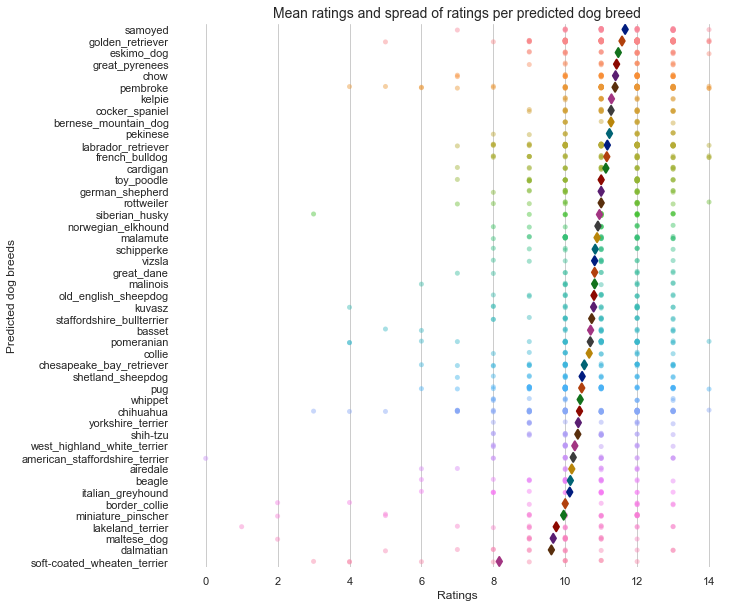

In [68]:
sns.set(style="whitegrid")
# Initialize the figure
f, ax = plt.subplots(figsize=(10,10))
sns.despine(bottom=True, left=True)
# Show each observation with a scatterplot
sns.stripplot(x='rating_numerator', y='predicted_breed', data=df_viz, dodge=True, jitter=True, alpha=.45, zorder=1)
# Show the conditional means
sns.pointplot(x='rating_numerator', y='predicted_breed', data=df_viz, palette="dark", dodge=.532, markers="d", scale=.95, ci=None)
# Improve the legend 
plt.title('Mean ratings and spread of ratings per predicted dog breed', fontsize=14)
plt.xlabel('Ratings')
plt.ylabel('Predicted dog breeds');